## Import Libraries and Files

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [21]:
# Path
path = r'/Users/michele/Desktop/CF/files/Module6/AirBnb'

In [23]:
# Import files
listing = pd.read_pickle(os.path.join(path, 'Data', 'Prepared', 'listing_rental.pkl'))

In [17]:
s_rent = pd.read_pickle(os.path.join(path, 'Data', 'Prepared', 'short_rental.pkl'))

In [19]:
l_rent = pd.read_pickle(os.path.join(path, 'Data', 'Prepared', 'long_rental.pkl'))

## Visualisations

In [21]:
# Subset short rents that only list private or shared rooms
short = s_rent.loc[(s_rent['room_type'] == 'Private room') | (s_rent['room_type'] == 'Shared room')]

In [23]:
short = short.copy()

In [25]:
# Flag the bedroom number for plotting  
short.loc[short['bedrooms'] == 0, 'n_bedroom'] = 'Studio'
short.loc[short['bedrooms'] == 1, 'n_bedroom'] = '1 bedroom'
short.loc[short['bedrooms'] >= 2, 'n_bedroom'] = '2+ bedrooms'

In [27]:
rooms = short.groupby('n_bedroom')['id'].nunique().reset_index()

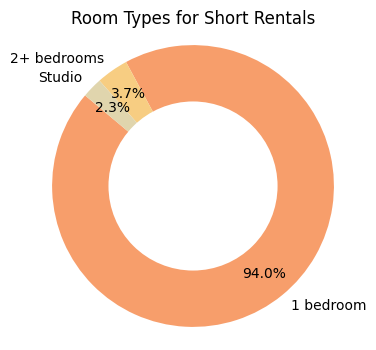

In [29]:
# Create figure
plt.figure(figsize=(4,4))
# Plot pie
plt.pie(rooms['id'],
        labels=rooms['n_bedroom'],
        colors=['#F79E6B', '#F7CD82', '#E0D5AD'], 
        autopct='%1.1f%%', 
        startangle=140, 
        pctdistance=0.80,
        wedgeprops=dict(width=0.5))
# Plot circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white') 
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Room Types for Short Rentals')
# Save figure
plt.savefig(os.path.join(path, 'Analysis', 's_rent_room_type.jpg'))
# Show figure
plt.show()

The majority of short-term rental apartments consist of one bedroom. This may indicate that these properties are primarily rented out for brief periods when the owners are not occupying them.

In [31]:
# Group the variables to plot the availability of long term listings
long_r = l_rent.groupby(['room_type', 'instant_bookable']).size().unstack()

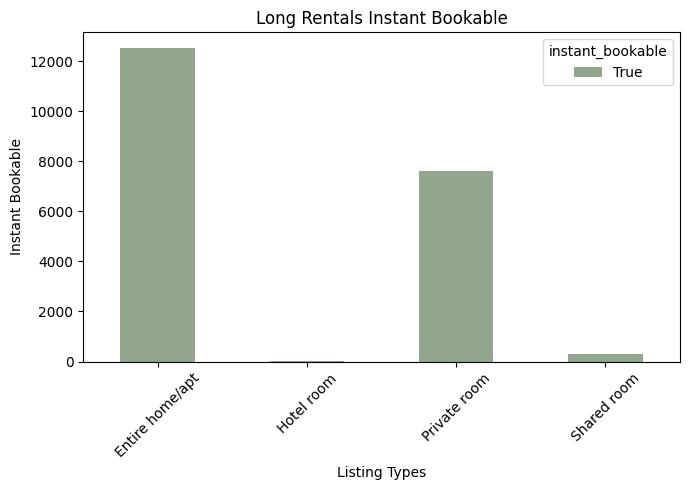

In [33]:
fig, ax= plt.subplots(figsize=(7, 5), dpi=100)
# Plot the stacked bar chart
long_r.plot(kind='bar', stacked=True, color=['#92A78C', '#E0D5AD'], ax=ax)
# Add title and labels 
ax.set_title('Long Rentals Instant Bookable')
ax.set_xlabel('Listing Types')
ax.set_ylabel('Instant Bookable')
plt.xticks(rotation=45)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
# Save figure
plt.savefig(os.path.join(path, 'Analysis', 'rental_bookable.jpg'))
# Show figure
plt.show()

In [35]:
# Select the variables relevant to the properties characteristics to make a correlation map with the price 
properties = l_rent[['bedrooms', 'beds', 'bathrooms', 'accommodates', 'price']]

In [37]:
# Correlation matrix
properties.corr()

,bedrooms,beds,bathrooms,accommodates,price
bedrooms,1.000000,0.547086,0.264903,0.604678,0.166054
beds,0.547086,1.000000,0.223795,0.753764,0.155994
bathrooms,0.264903,0.223795,1.000000,0.238732,0.127961
accommodates,0.604678,0.753764,0.238732,1.000000,0.209431
price,0.166054,0.155994,0.127961,0.209431,1.000000


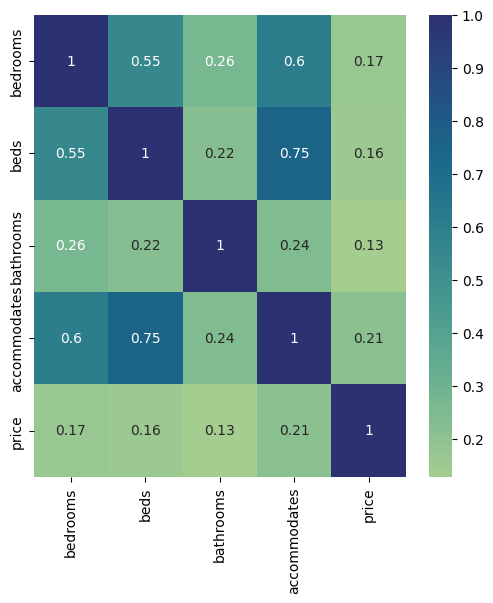

In [39]:
# Plot correlation map
f, ax = plt.subplots(figsize=(6,6)) 
corr = sns.heatmap(properties.corr(), annot=True, ax=ax, cmap='crest')
# Save figure
plt.savefig(os.path.join(path, 'Analysis', 'price_correl.jpg'), bbox_inches='tight')

The correlation map highlights the relationships between the listings rental price per night and the characteristics of the house.<br>
A weak positive correlation is observed between the price and the number of bedrooms, beds, and the apartment's guest capacity. This indicates that an increase in the number of bedrooms, beds, and guests accommodated tends to drive up the rental price, but the impact is quite limited.

In [25]:
# Flag the number of listings for visualisation
listing.loc[listing['host_listings'] == 1, 'n_listings'] = '1 listing'
listing.loc[listing['host_listings'] == 2, 'n_listings'] = '2 listings'
listing.loc[listing['host_listings'] >= 3, 'n_listings'] = '3+ listings'

In [43]:
# Group data to plot
h_list = listing.groupby('n_listings')['host_id'].nunique()

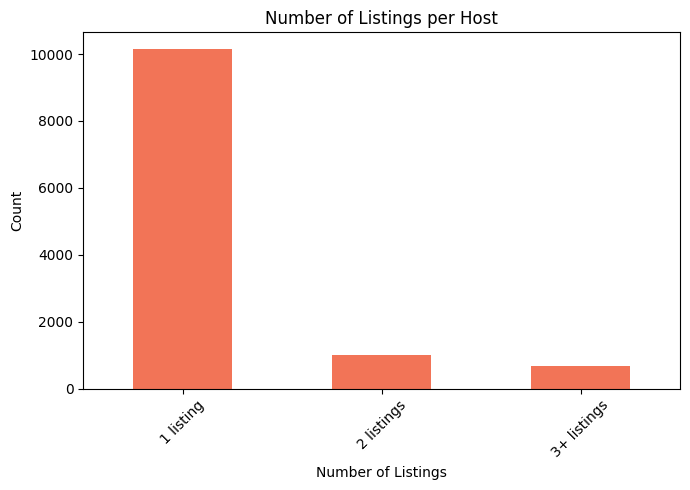

In [45]:
fig, ax=plt.subplots(figsize=(7, 5), dpi=100)
# Plot the bar chart
h_list.plot(kind='bar', stacked=False, color=['#F27457'], ax=ax)
# Add title and labels 
ax.set_title('Number of Listings per Host')
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
# Save figure
plt.savefig(os.path.join(path, 'Analysis', 'listings_per_host.jpg'))
# Show figure
plt.show()

In [73]:
# Flag the host location for visualisation
def flag_location(location):
    if isinstance(location, str):  
        if location == 'Berlin, Germany':
            return 'Berlin'
        elif location == 'Germany':
            return 'Germany'
        elif location.endswith(', Germany'):
            return 'Germany'
        else:
            return 'Other' 
    else:
        return 'Other'

In [75]:
# Apply function
listing['host_loc'] = listing['host_location'].apply(flag_location)

In [79]:
listing['host_loc'].value_counts()

Berlin     37944
Other      12796
Germany     2787
Name: host_loc, dtype: int64

In [83]:
# Group data to plot
loc = listing.groupby('host_loc')['host_id'].nunique().reset_index()

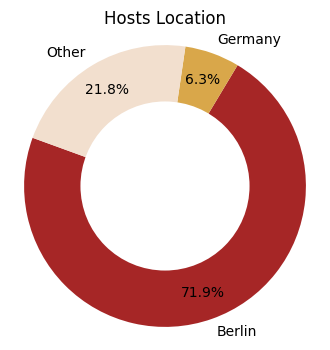

In [87]:
# Create figure
plt.figure(figsize=(4,4))
# Plot pie
plt.pie(loc['host_id'],
        labels=loc['host_loc'],
        colors=['#A62626', '#D9A74A', '#F2DFCE'], 
        autopct='%1.1f%%', 
        startangle=160, 
        pctdistance=0.80,
        wedgeprops=dict(width=0.5))
# Plot circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white') 
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Hosts Location')
# Save figure
plt.savefig(os.path.join(path, 'Analysis', 'hosts_location.jpg'))
# Show figure
plt.show()

## Export Files 

In [89]:
listing.to_pickle(os.path.join(path, 'Data', 'Prepared', 'listing_final.pkl'))

In [ ]:
short.to_pickle(os.path.join(path, 'Data', 'Prepared', 'short_beds.pkl'))